In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

In [2]:
sam = sam_model_registry["vit_h"](checkpoint="data/SAM/sam_vit_h_4b8939.pth")
sam = sam.to("cuda")

In [3]:
mask_generator = SamAutomaticMaskGenerator(
    sam,
    
)

In [15]:
def resize_image(image, n_pixels):
    
    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Determine the scaling factor for resizing
    if width > height:
        scaling_factor = n_pixels / width
    else:
        scaling_factor = n_pixels / height

    # Resize the image
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)
    resized_image = cv2.resize(image, (new_width, new_height))

    return resized_image

def show_anns(anns, ax):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    # ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
        
    return img

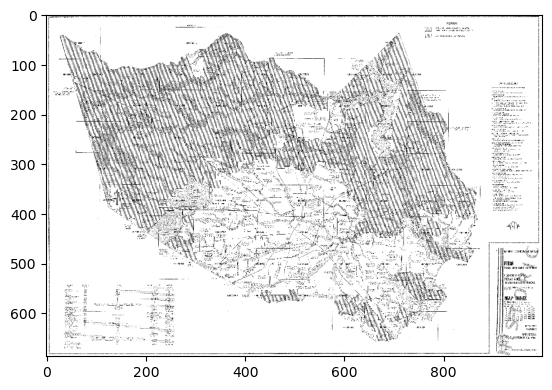

In [5]:
image = cv2.imread('data/TileIndices/48201CIND0_0992.tif')
image_res = resize_image(image, 1000)
plt.imshow(image_res)

In [ ]:
masks = mask_generator.generate(image_res)

In [8]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 320766,
  'bbox': [31, 41, 832, 613],
  'predicted_iou': 1.0010994672775269,
  'point_coords': [[577.546875, 568.921875]],
  'stability_score': 0.9773426055908203,
  'crop_box': [0, 0, 999, 687]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 27590,
  'bbox': [35, 5

In [13]:
print(test.shape)

(687, 999, 4)


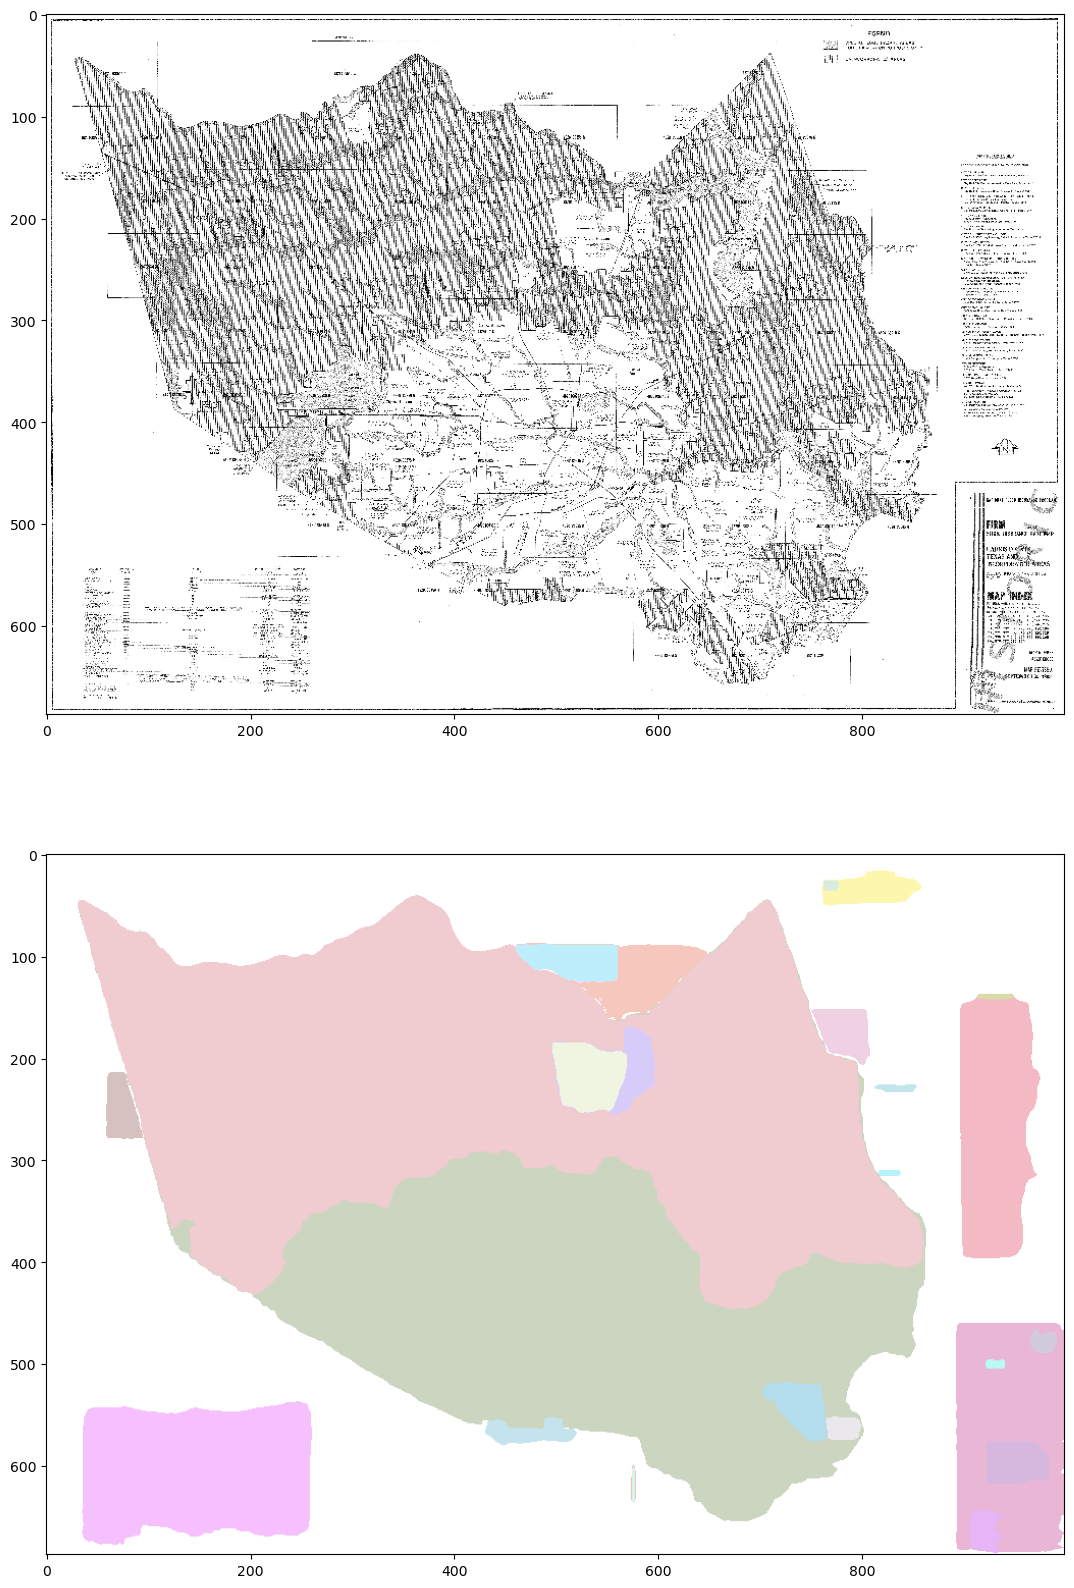

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
axs[0].imshow(image_res)
#axs[1].imshow(image_res)
masks_img = show_anns(masks, axs[1])
axs[1].imshow(masks_img)

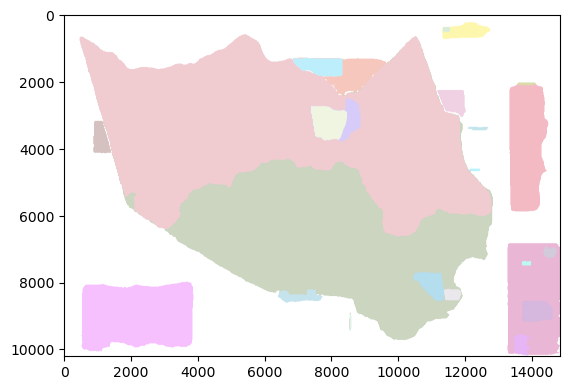

In [25]:
def revert_resizing(resized_image, original_image):
    # Get the dimensions of the original image
    original_height, original_width = original_image.shape[:2]

    # Get the dimensions of the resized image
    resized_height, resized_width = resized_image.shape[:2]

    # Determine the scaling factor for reverting the resizing
    if resized_width > resized_height:
        scaling_factor = original_width / resized_width
    else:
        scaling_factor = original_height / resized_height

    # Resize the image back to the original dimensions
    new_width = int(resized_width * scaling_factor)
    new_height = int(resized_height * scaling_factor)
    reverted_image = cv2.resize(resized_image, (new_width, new_height))

    return reverted_image * 255

or_res_masks = revert_resizing(masks_img, image).astype(np.uint8)

plt.imshow(or_res_masks)

(array([6.23745430e+07, 5.84203900e+06, 3.98623880e+07, 9.47952420e+07,
        1.09989674e+08, 3.40614630e+07, 3.09221700e+06, 6.56276700e+06,
        4.82550140e+07, 2.00933453e+08]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

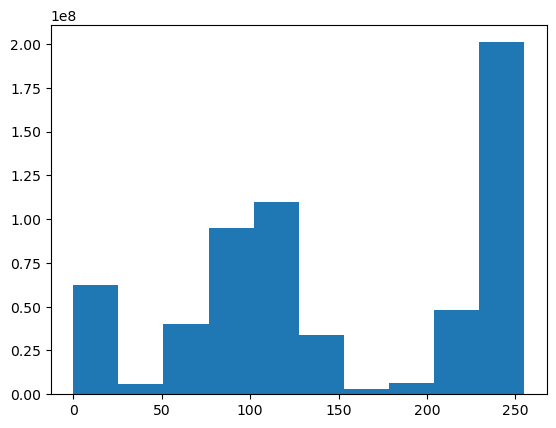

In [28]:
plt.hist(or_res_masks.flatten())

In [26]:
cv2.imwrite("masks_test.png", or_res_masks)

True

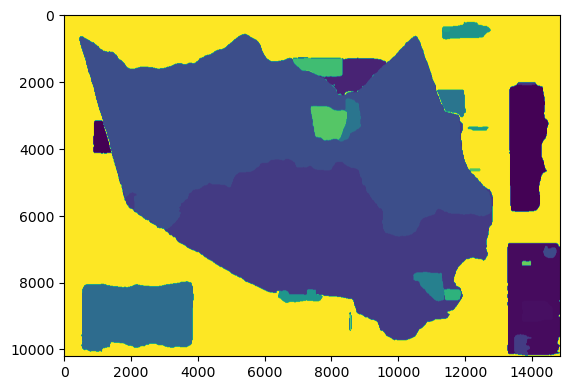

In [34]:
or_res_masks_grey  = cv2.cvtColor(or_res_masks, cv2.COLOR_BGR2GRAY)
plt.imshow(or_res_masks_grey)

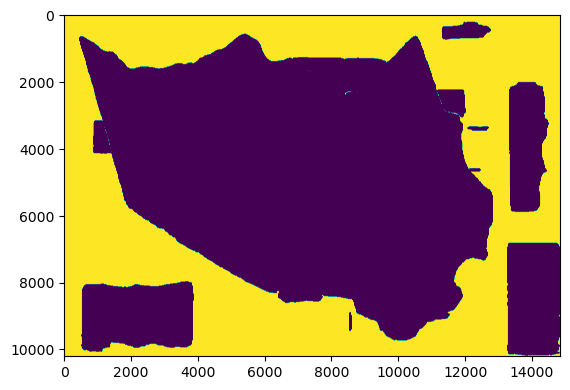

In [35]:
or_res_masks_black = np.where(or_res_masks_grey < 250, 0, 255)

plt.imshow(or_res_masks_black)

In [36]:
cv2.imwrite("masks_black.png", or_res_masks_black)

True